In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./Datasets/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [8]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [9]:
df.drop(['Car_Name'], axis = 1, inplace=True)

In [10]:
df["Current_Year"] = 2021
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [11]:
df["No_years"] = df["Current_Year"] - df["Year"]
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [12]:
df.drop('Year', axis = 1, inplace=True)

In [13]:
final_df = pd.get_dummies(df, drop_first=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,2021,7,0,1,0,1
1,4.75,9.54,43000,0,2021,8,1,0,0,1
2,7.25,9.85,6900,0,2021,4,0,1,0,1
3,2.85,4.15,5200,0,2021,10,0,1,0,1
4,4.60,6.87,42450,0,2021,7,1,0,0,1


In [14]:
final_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,NaN,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,NaN,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,NaN,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,NaN,0.182104,-0.053469,0.055687,0.124269,-0.050316
Current_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_years,-0.236141,0.047584,0.524342,0.182104,NaN,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,NaN,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,NaN,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,NaN,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,NaN,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [15]:
final_df.drop('Current_Year', axis = 1, inplace=True)

<AxesSubplot:>

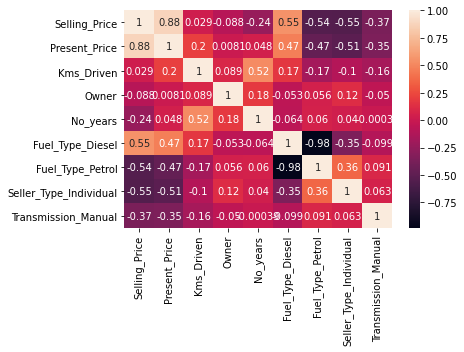

In [16]:
import seaborn as sns

corr = final_df.corr()
sns.heatmap(corr, annot = True)

In [17]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [18]:
X = final_df.iloc[:, 1:-1]
y = final_df.iloc[:, 1]

X.head()

,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual
0,5.59,27000,0,7,0,1,0
1,9.54,43000,0,8,1,0,0
2,9.85,6900,0,4,0,1,0
3,4.15,5200,0,10,0,1,0
4,6.87,42450,0,7,1,0,0


In [19]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=5)

print(x_train.shape)
print(y_train.shape)

(225, 7)
(225,)


In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf

RandomForestRegressor()

In [21]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [22]:
y_pred = rf.predict(x_test)
# y_pred.toarray()
# y_pred

In [23]:
rf.score(X, y)

0.9740142633735567

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

#this will tell us about which feature are important for us
model = ExtraTreesRegressor()

model.fit(X, y)

print(model.feature_importances_)

[9.03638878e-01 1.80309117e-04 1.65008729e-03 5.46525562e-03
 2.07745375e-03 1.46868883e-03 8.55193270e-02]


In [25]:
fe = pd.Series(model.feature_importances_, index = X.columns)

In [26]:
fe

Present_Price             0.903639
Kms_Driven                0.000180
Owner                     0.001650
No_years                  0.005465
Fuel_Type_Diesel          0.002077
Fuel_Type_Petrol          0.001469
Seller_Type_Individual    0.085519
dtype: float64

<AxesSubplot:>

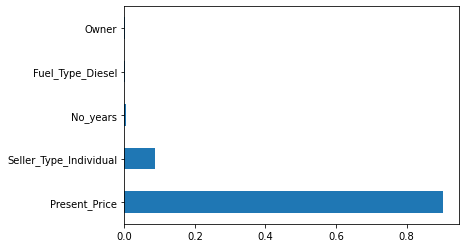

In [27]:
fe.nlargest(5).plot(kind='barh')
# plt.show()

# Creating diff models to choose the best

In [28]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)



In [29]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

print("MSE:", metrics.mean_squared_error(y_test, y_pred))

print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 = metrics.r2_score(y_test, y_pred)
print("R2", R2)

MAE: 2.001856283079543e-13
MSE: 2.436883075771947e-25
RMSE: 4.936479591542891e-13
R2 1.0


# Decision Tree model

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

print("MSE:", metrics.mean_squared_error(y_test, y_pred))

print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 = metrics.r2_score(y_test, y_pred)
print("R2", R2)

MAE: 0.09031578947368431
MSE: 0.09814863157894746
RMSE: 0.31328681998920327
R2 0.9983466288948057


# Random Forestmodel

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

print("MSE:", metrics.mean_squared_error(y_test, y_pred))

print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 = metrics.r2_score(y_test, y_pred)
print("R2", R2)

MAE: 0.09054868421052718
MSE: 0.046113157781577326
RMSE: 0.21473974429894743
R2 0.9992231968860005


We want that the R2 score must be maximum and other 3 errors must minimum for a model to be good.

Now we select the best of the three models and tune it to get more accuracy for our results

# Hyperparameter Tuning

we try to get the best set of parameters for our model, that will give us the best possible scores

Grid Search CV - It searches for al possible combination of parameters and searchs the best among them. It takes in model, parameters dictionary and CV as parameters.
It is a bit slow as it tries each and every combination there can be from the parameters dictionary.

Random Search CV - It tries random set of parameters for tuning the model.

In [33]:
from sklearn.model_selection import RandomizedSearchCV

#an array to change no of trees in the randomForest
n_estimators = [int(x) for x in np.linspace(start=100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

#max levels in a tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

#min number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

#min no of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [40]:
# create a dictionary and put all the paraeters to be consider for tuning
random_grid = {'n_estimators': n_estimators, 
               'max_features':max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf}

print(random_grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:
rf_randomised = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 100, cv = 5, verbose = 2, random_state = 42, n_jobs=1)


In [42]:
# rf_randomised.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=15, max_feature

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.5s
[CV] END max_depth=10, max_

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   1.2s
[CV] END max_depth=30,

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_fe

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   2.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=10, m

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
rf_randomised.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [44]:
rf_randomised.best_score_

-15.746398099240356

# final predictions

In [45]:
y_pred = rf_randomised.predict(x_test)

from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

print("MSE:", metrics.mean_squared_error(y_test, y_pred))

print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 = metrics.r2_score(y_test, y_pred)
print("R2", R2)

MAE: 0.11608249932560598
MSE: 0.1048770738785781
RMSE: 0.32384730024901875
R2 0.9982332843488634


# Save the model


In [ ]:
'''
import pickle 

with open('car_price_model.pkl', 'wb') as f:
    pickle.dump(rf_random, file)
'''